In [15]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 

In [17]:
#lattice parameters for AD at 300Mev/c
# from https://acc-models.web.cern.ch/acc-models/ad/scenarios/lowenergy/lowenergy.tfs
qx = 5.45020077392
qy = 5.41919929346
dqx=-20.10016919292
dqy=-22.29552755573
circumference = 182.43280000000 #m

# relativistic factors
gamma_rel = 1.04987215550 # at 300 MeV/c

# optics at e-cooler (approximate), in m
beta_x = 10 
beta_y = 4
D_x = 0

# some initial beam parameters
emittance = 10e-6
dp_p = 1e-3 
q0 = 1

# simulation parameters: simulate 20 s of cooling, and take data once every 10 ms
max_time_s = 1
int_time_s = 0.01

In [18]:
# some constants, and simple computations
clight=constants.speed_of_light
mass0 = 938.27208816*1e6 #ev/c^2

beta_rel = np.sqrt(gamma_rel**2 - 1)/gamma_rel
p0c = mass0*beta_rel*gamma_rel #eV/c
T_per_turn = circumference/(clight*beta_rel)

# compute length of simulation, as well as sample interval, in turns
num_turns = int(max_time_s/T_per_turn)
save_interval = int(int_time_s/T_per_turn)

# compute initial beam parameters
x_init = np.sqrt(beta_x*emittance)
y_init = np.sqrt(beta_y*emittance)

#### A much faster example
simply track a single particle for all turns, and ask to keep turn-by-turn data

In [30]:

# # assume the ring is always the same, with length equal the full circumference...
# # (in theory, one could "remove" the length of the e-cooler...)
# arc = xt.LineSegmentMap(
#         qx=qx, qy=qx,
#         dqx=dqx, dqy=dqy,
#         length=circumference,
#         betx=beta_x,
#         bety=beta_y,
#         dx=D_x)
# # for every cooler, build a new line, and track a single particle, .. and plot

# # preapre figure
# plt.figure(figsize=(10, 5))
# plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
# # actual simulation
# for i, magnetic_field_ratio in enumerate(magnetic_field_ratio_list):
#         # get the expected cooler length
#         length = length_list[i]
#         # define e-cooler
#         electron_cooler = xt.ElectronCooler(
#                 length=length,
#                 radius_e_beam=radius_e_beam,
#                 current=current,
#                 temp_perp=temp_perp,
#                 temp_long=temp_long,
#                 magnetic_field=magnetic_field, 
#                 magnetic_field_ratio=magnetic_field_ratio,
#                 space_charge=1)
        

#         line = xt.Line(
#                 elements=[arc, electron_cooler])
#         line.particle_ref = xp.Particles(mass0=mass0, q0=q0, p0c=p0c)
#         context = xo.ContextCpu(omp_num_threads=4)
#         line.build_tracker(_context=context)
        
#         particle = xp.Particles(
#             mass0=mass0,
#             p0c=p0c,
#             q0=q0,
#             x=x_init,
#             px=0,
#             y=y_init,
#             py=0,
#             delta=dp_p,
#             zeta=0)
        
#         # track
#         line.track(particle, num_turns=num_turns,
#               turn_by_turn_monitor=True,with_progress=True)
        
#         # compute action at the end for all turns
#         action_x = (line.record_last_track.x[0,:]**2/beta_x + beta_x*line.record_last_track.px[0,:]**2)
#         time = np.arange(len(action_x)) * T_per_turn
#         plt.plot(time,action_x,label='$B_{\perp}/B_{\parallel}$='f'{magnetic_field_ratio:.0e}')

# plt.xlabel('Time [s]')
# plt.ylabel('$J_x$ $[\mu m]$')
# plt.legend()
# plt.legend(['Ideal', 'Conceptual Specs', 'Engineering Spec', 'Present e-cooler'])

In [31]:
# import numpy as np

# import xobjects as xo
# import xtrack as xt

# ## Generate a simple line
# line = xt.Line(
#     elements=[xt.Drift(length=2.),
#               xt.Multipole(knl=[0, 0.5], ksl=[0,0]),
#               xt.Drift(length=1.),
#               xt.Multipole(knl=[0, -0.5], ksl=[0,0])],
#     element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

# ## Attach a reference particle to the line (optional)
# ## (defines the reference mass, charge and energy)
# line.particle_ref = xt.Particles(p0c=6500e9, #eV
#                                  q0=1, mass0=xt.PROTON_MASS_EV)

# ## Choose a context
# context = xo.ContextCpu()         # For CPU
# # context = xo.ContextCupy()      # For CUDA GPUs
# # context = xo.ContextPyopencl()  # For OpenCL GPUs

# ## Transfer lattice on context and compile tracking code
# line.build_tracker(_context=context)

# ## Build particle object on context
# n_part = 20
# particles = line.build_particles(
#                         x=np.random.uniform(-1e-3, 1e-3, n_part),
#                         px=np.random.uniform(-1e-5, 1e-5, n_part),
#                         y=np.random.uniform(-2e-3, 2e-3, n_part),
#                         py=np.random.uniform(-3e-5, 3e-5, n_part),
#                         zeta=np.random.uniform(-1e-2, 1e-2, n_part),
#                         delta=np.random.uniform(-1e-4, 1e-4, n_part))
# # Reference mass, charge, energy are taken from the reference particle.
# # Particles are allocated on the context chosen for the line.

# ## Track (no saving of turn-by-turn data)
# n_turns = 100
# line.track(particles, num_turns=n_turns)

# particles.state # > 0 for particles still alive
# particles.at_turn # turn number (for lost particles, it is the turn of loss)
# particles.x # x position after tracking
# particles.px # x momentum after tracking
# # etc...

# ## Track (saving turn-by-turn data)
# particles = line.build_particles( # fresh particles
#                         x=np.random.uniform(-1e-3, 1e-3, n_part),
#                         px=np.random.uniform(-1e-5, 1e-5, n_part),
#                         y=np.random.uniform(-2e-3, 2e-3, n_part),
#                         py=np.random.uniform(-3e-5, 3e-5, n_part),
#                         zeta=np.random.uniform(-1e-2, 1e-2, n_part),
#                         delta=np.random.uniform(-1e-4, 1e-4, n_part))
# n_turns = 100
# line.track(particles, num_turns=n_turns,
#               turn_by_turn_monitor=True)

# ## Turn-by-turn data is available at:
# line.record_last_track.x

we need to make a second arc to do the matching because you cannot match without RF in Xsuite. So we make a fake arc with an arbitrary RF to do the matching, but we change the longitudinal parameters manually afterwards.

In [19]:
qs=0.005247 # Value doesnt really matter. We are going to set the longitundal parameters manuually anyways
bets0=2078

arc_matching = xt.LineSegmentMap(
        qx=qx, qy=qy,
        dqx=dqx, dqy=dqy,
        length=circumference,
        betx=beta_x,
        bety=beta_y,
        qs=qs,
        bets=bets0)

line_matching=xt.Line([arc_matching])
line_matching.build_tracker()

In [8]:
n_part = 1000

In [9]:
# Define the whole machine
arc = xt.LineSegmentMap(
        qx=qx, qy=qx,
        dqx=0, dqy=0,
        length=circumference,
        betx=beta_x,
        bety=beta_y,
        dx=D_x)

# create a monitor object, to reduce holded data
monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=1,
                              n_repetitions=int(num_turns/save_interval),
                              repetition_period=save_interval,
                              num_particles=n_part)

line = xt.Line(
        elements=[monitor,  arc])

particle_ref = xp.Particles(mass0=mass0, q0=q0, p0c=p0c)
line.particle_ref = particle_ref
line.build_tracker()

In [21]:
# create desired beam
bunch_intensity = None
beta_gamma = line.particle_ref._beta0*line.particle_ref._gamma0
gemitt_x = 10e-6
gemitt_y = 5e-6
nemitt_x = gemitt_x*beta_gamma
nemitt_y = gemitt_y*beta_gamma
sigma_dp = 1e-3
particles = xp.generate_matched_gaussian_bunch(
         num_particles=n_part,total_intensity_particles=bunch_intensity,
         nemitt_x=nemitt_x, nemitt_y=nemitt_y, sigma_z=1,
         line=line_matching,
         particle_ref=particle_ref)



In [26]:
print(particles.zeta[0])
line.track(particles, freeze_longitudinal=True)
print(particles.zeta[0])

-0.9673226583833754
-0.9673226583833754


now we manually set the longitundal properties to a coasting beam.

In [11]:
particles.zeta = np.random.uniform(-circumference/2, circumference/2, n_part)
particles.delta = np.random.normal(loc=0.0, scale=sigma_dp, size=n_part)

In [12]:
# just track all particles, and keep turn-by-turn data (memory expensive!)
line.track(particles, num_turns=num_turns,
              turn_by_turn_monitor=False)

In [31]:
monitor.x?


Type:        ndarray
String form:
[[[ 0.00523226]
           [-0.00452755]
           [-0.00865336]
           ...
           [-0.01575712]
           [-0.00394592]
           [-0.00226 <...> 01386282]
           [-0.00219447]
           [ 0.01266729]
           ...
           [-0.00096521]
           [ 0.00695133]
           [-0.01447358]]]
Length:      100
File:        ~/2409/Tutorial/miniforge/lib/python3.12/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level meth

In [13]:
# extract relevant values
x = monitor.x[:,:,0]
px = monitor.px[:,:,0]
y = monitor.y[:,:,0]
py = monitor.py[:,:,0]
delta = monitor.delta[:,:,0]
time = monitor.at_turn[:, 0, 0] * T_per_turn

In [14]:
# compute actions. for x, remove the dp/p contribution:
action_x = ((x-D_x*delta)**2/beta_x + beta_x*px**2)
# for y, simple compute:
action_y = (y**2/beta_y + beta_y*py**2)

#### Simple plot, using rms emittances values
Normally this is good enough. 
Maybe some can question the fact that profiles are far from being Gaussian here (no heating effects)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_1395536/293139092.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(time, np.mean(action_x, axis=1)/gemitt_x/2, label=f'RMS $\epsilon_x$ (init={gemitt_x})')
/tmp/pkruyt/ipykernel_1395536/293139092.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(time, np.mean(action_y, axis=1)/gemitt_y/2, label=f'RMS $\epsilon_y$ (init={gemitt_y})')


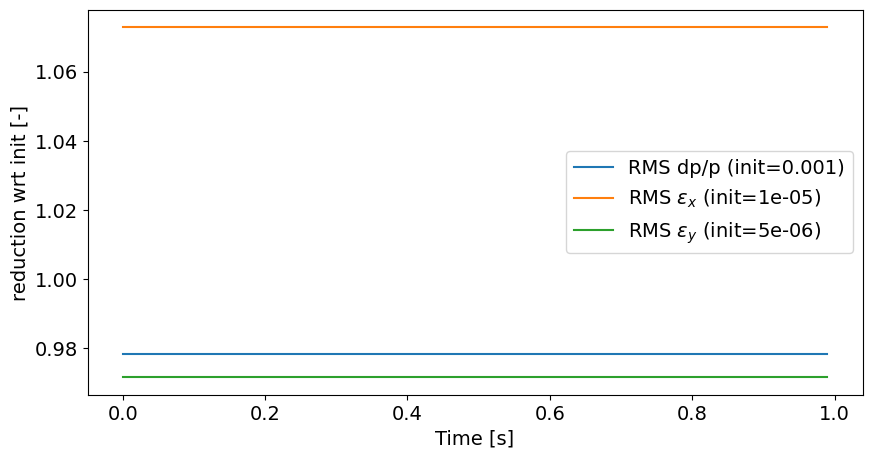

In [40]:
# plot some overall values
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, np.std(delta, axis=1)/sigma_dp, label=f'RMS dp/p (init={sigma_dp})')

#(WARNING! FACTOR 2 TO BE UNDERSTOOD!)
plt.plot(time, np.mean(action_x, axis=1)/gemitt_x/2, label=f'RMS $\epsilon_x$ (init={gemitt_x})')
plt.plot(time, np.mean(action_y, axis=1)/gemitt_y/2, label=f'RMS $\epsilon_y$ (init={gemitt_y})')
plt.xlabel('Time [s]')
plt.ylabel('reduction wrt init [-]')
plt.legend()

#### More complex, looking at 95% of particles
The idea here is to make an histogram on the action/coordinates, then look for comulative sum where we have at least 95% of particles, starting from the center.
==> no major difference with rms

In [41]:
# Note, within n*emittance, one have n_% of particles where
#  n=1; n_% = 39%
#  n=2; n_% = 63%
#  n=4; n_% = 87%
#  n=6; n_% = 95%

# Let's consider 95% of particles, i.e. n=6 for transverse action, and n=2 for abs dp/p
n_bins = 100
bins_x  = gemitt_x*np.linspace(0,7,n_bins+1)
bins_y  = gemitt_y*np.linspace(0,7,n_bins+1)
bins_dp = sigma_dp*np.linspace(0,3,n_bins+1)
hist_x  = bins_x[0:] + ( bins_x[1] -  bins_x[0])/2
hist_y  = bins_y[0:] + ( bins_y[1] -  bins_y[0])/2
hist_dp = bins_dp[0:]+ (bins_dp[1] - bins_dp[0])/2
all_hist_x  = np.zeros((len(time), n_bins))
all_hist_y  = np.zeros((len(time), n_bins))
all_hist_dp = np.zeros((len(time), n_bins))
all_found_x = np.zeros((len(time)))
all_found_y = np.zeros((len(time)))
all_found_dp = np.zeros((len(time)))

for i_turn in np.arange(len(time)): 
    all_hist_x[i_turn,:], _  = np.histogram(action_x[i_turn,:],      bins=bins_x,  density=False, weights=None)
    all_hist_y[i_turn,:], _  = np.histogram(action_y[i_turn,:],      bins=bins_y,  density=False, weights=None)
    all_hist_dp[i_turn,:], _ = np.histogram(np.abs(delta[i_turn,:]), bins=bins_dp, density=False, weights=None)

    _aux = np.where(np.cumsum(all_hist_x[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_x[i_turn] = hist_x[_aux[0]]
    else:
        all_found_x[i_turn] = hist_x[-1]
    
    _aux = np.where(np.cumsum(all_hist_y[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_y[i_turn] = hist_y[_aux[0]]
    else:
        all_found_y[i_turn] = hist_y[-1]

    _aux = np.where(np.cumsum(all_hist_dp[i_turn,:]/n_part) > 0.95)[0]
    if len(_aux) > 0:
        all_found_dp[i_turn] = hist_dp[_aux[0]]
    else:
        all_found_dp[i_turn] = hist_dp[-1]


<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/tmp/pkruyt/ipykernel_1395536/2857416857.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(time, all_found_x/gemitt_x/6, label=f'95% $\epsilon_x$ (init={6*gemitt_x:.1e})')
/tmp/pkruyt/ipykernel_1395536/2857416857.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(time, all_found_y/gemitt_y/6, label=f'95% $\epsilon_y$ (init={6*gemitt_y:.1e})')


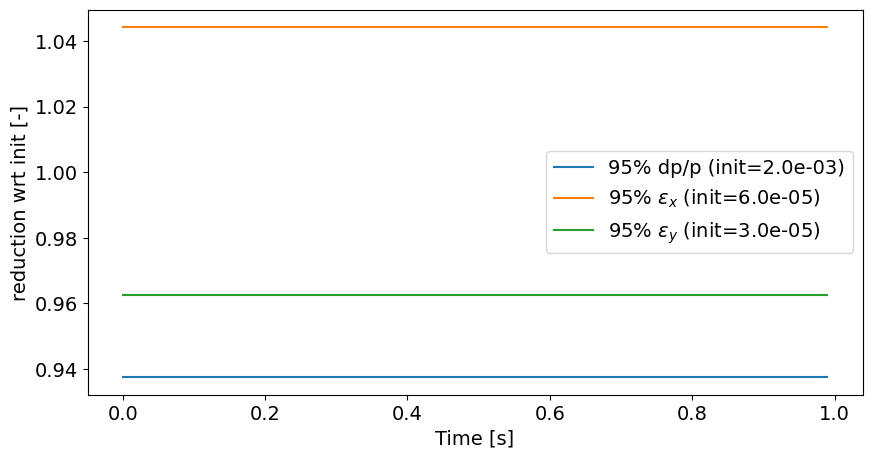

In [42]:
# finally the plots
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, all_found_dp/sigma_dp/2, label=f'95% dp/p (init={2*sigma_dp:.1e})')

#(WARNING! FACTOR 2 TO BE UNDERSTOOD!)
plt.plot(time, all_found_x/gemitt_x/6, label=f'95% $\epsilon_x$ (init={6*gemitt_x:.1e})')
plt.plot(time, all_found_y/gemitt_y/6, label=f'95% $\epsilon_y$ (init={6*gemitt_y:.1e})')
plt.xlabel('Time [s]')
plt.ylabel('reduction wrt init [-]')
plt.legend()

## APPENDIX

##### Plot of single particle quantities

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/pkruyt/ipykernel_1395536/1828500323.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_x$ $[\mu m]$')
/tmp/pkruyt/ipykernel_1395536/1828500323.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_y$ $[\mu m]$')


Text(0, 0.5, '$J_y$ $[\\mu m]$')

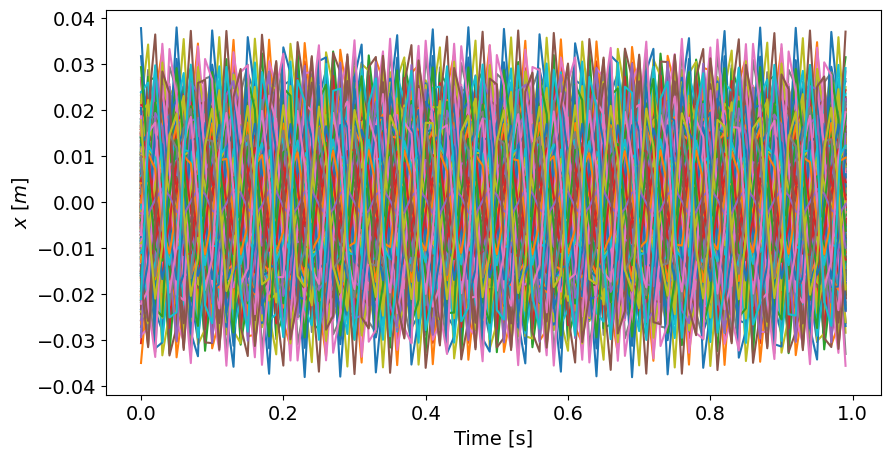

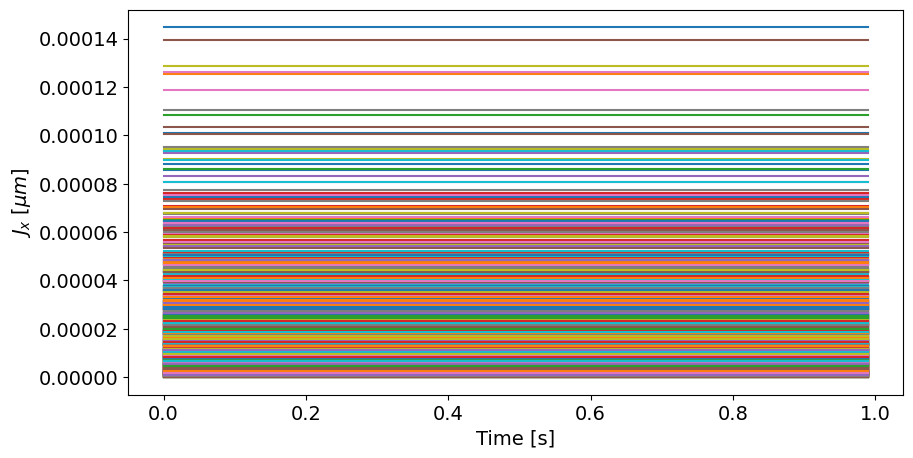

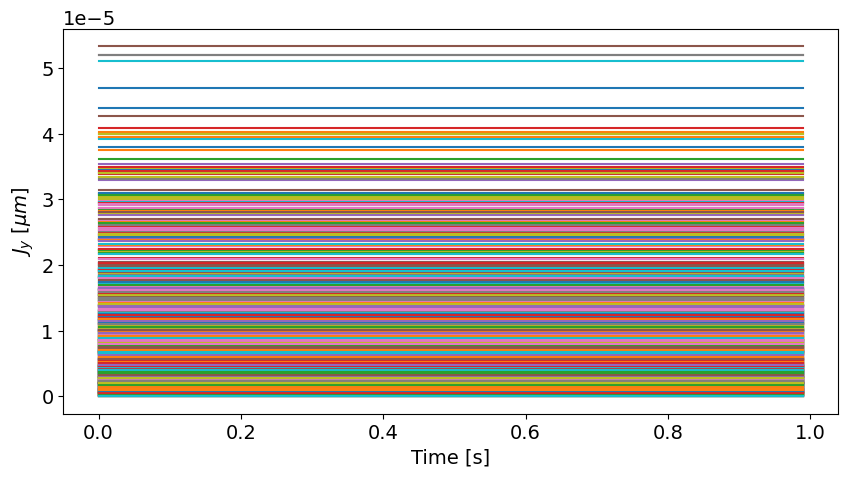

In [43]:
# show each particles x
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, x)
plt.xlabel('Time [s]')
plt.ylabel('$x$ $[m]$')

# show each particles actions
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, action_x)
plt.xlabel('Time [s]')
plt.ylabel('$J_x$ $[\mu m]$')

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
plt.plot(time, action_y)
plt.xlabel('Time [s]')
plt.ylabel('$J_y$ $[\mu m]$')

#### Schottky-like plot of histrograms

Text(0, 0.5, '$J_x$')

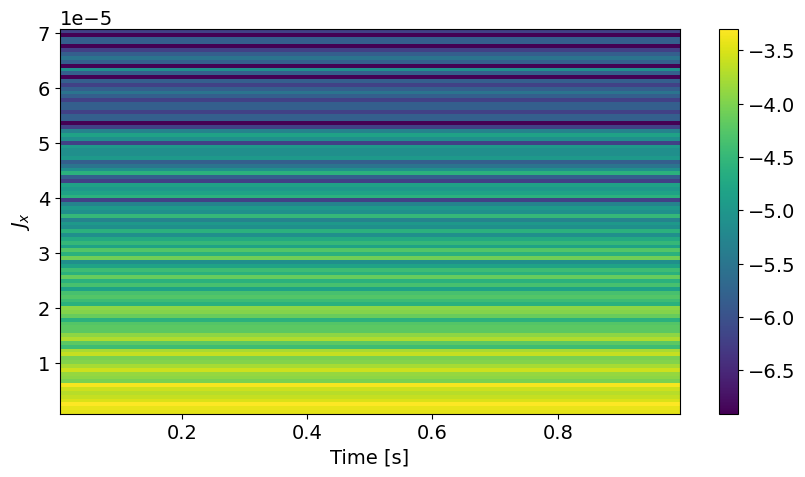

In [44]:
def imagesc(im, x = None, y = None, **kwargs):
    """
    Wrapper for PyPlot's `imshow` to imitate Matlab-style IMAGESC.

    `imagesc(z; x, y)` treats `z` as a 2D array to visualize, with `x` giving pixel coordinates
    across a row and `y` giving pixel columns *down* a column.

    Omitting `x` and/or `y` implies `1:size(z, 2)` and `1:size(z, 1)` respectively.

    PyPlot will show the image using a carefully-constructed call to `PyPlot.imshow` where:
    - the extent is carefully initialized so the plot's ticks line up exactly with `x` and `y`
    - the origin is at the lower-left of the window
    - the aspect ratio is fluid (uses the full window)
    - no interpolation is applied.
    """
    if x is None:
        x = np.arange(np.shape(im)[1])
    if y is None:
        y = np.arange(np.shape(im)[0])

    def _extents(f):
        delta = f[2] - f[1]
        return [f[1] - delta / 2, f[-1] + delta / 2]
    plt.imshow(im, extent=(_extents(x)[0], _extents(x)[-1], _extents(y)[0],  _extents(y)[-1]), aspect="auto", origin="lower", interpolation="none", **kwargs)

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})  # set the default fontsize to 14
imagesc(np.log((all_hist_x+1)/n_part).transpose(), time, hist_x)
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('$J_x$')